In [12]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'font.family': 'serif'})
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rcParams.update({'font.size': SSSMALL_SIZE})          
plt.rcParams.update({'axes.titlesize': MEDIUM_SIZE})     
plt.rcParams.update({'axes.labelsize': MEDIUM_SIZE})    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)

In [7]:
archivos = [2,6,10,14,20]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/campos_gaussianos/divergencia_watershed/mock_divergence_mesh_256_box_320_slim_{}.h5'

divergencias = []


for i in archivos:
    with h5py.File(filename.format(i), 'r') as f:
        print(f.keys())
        divergence = list(f.keys())[0]

        dataDivergence = np.array(f[divergence])
    divergencias.append(dataDivergence)
    

std = []
for i in divergencias:
    std.append(np.std(i.flatten()))

OSError: 

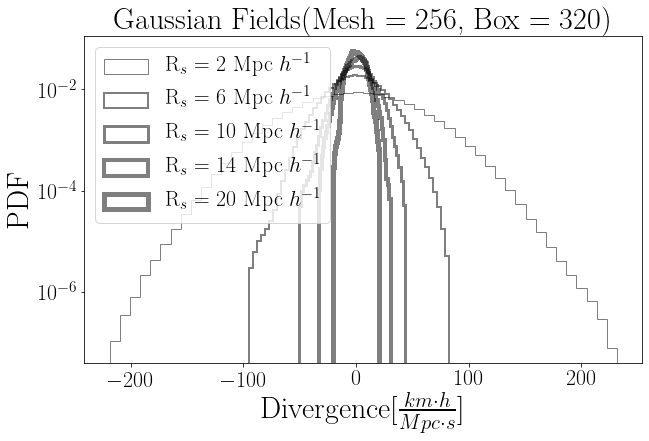

In [21]:
labels = ['V$_{Max}$ = 125 km/s','V$_{Max}$ = 180 km/s','V$_{Max}$ = 300 km/s']
plt.figure(figsize = (10,6))
for i in range(len(divergencias)):
    plt.hist(divergencias[i].flatten(), bins = 50, color = 'black', density = True,histtype = 'step',lw = 1 + i,alpha = 0.5, label = 'R$_{{s}}$ = {} Mpc $h^{{-1}}$'.format(archivos[i]))
plt.title(r"Gaussian Fields(Mesh = 256, Box = 320)")
plt.xlabel(r'Divergence[$\frac{km\cdot h}{Mpc\cdot s}]$')
plt.ylabel("PDF")
plt.yscale('log')
plt.legend(fontsize=SMALL_SIZE, loc=2)

plt.savefig("gf_divergence_mesh_256_box_320.pdf", bbox_inches='tight')

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
archivos = [3,5,7,10]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos_python/env/archivos/Catalogo/misma_cosmologia/Simulacion0/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{}.0_nside_360.hdf5'

velocidades = []

divergencias = []

aleatorio = 250
for i in archivos:
    with h5py.File(filename.format(i), 'r') as f:
        print(f.keys())
        divergence = list(f.keys())[0]
        vel_x = list(f.keys())[1]
        vel_y = list(f.keys())[2]
        vel_z = list(f.keys())[3]
        add = []
        dataDivergence = np.array(f[divergence])
        data_vel_x = np.array(f[vel_x])
        data_vel_y = np.array(f[vel_y])
        data_vel_z = np.array(f[vel_z])
        add.append(data_vel_x)
        add.append(data_vel_y)
        add.append(data_vel_z)
    velocidades.append(add)
    divergencias.append(dataDivergence)

<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>
<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>
<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>
<KeysViewHDF5 ['divergence', 'vel_x', 'vel_y', 'vel_z']>


<ipython-input-3-ef5a19087d35>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("planck_velocity_sigma_6.pdf", optimize= True)


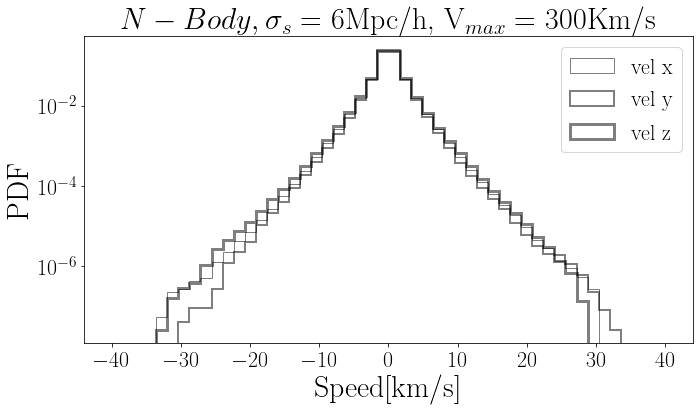

In [3]:
labels = ['vel x','vel y','vel z']
plt.figure(figsize = (10,6))
for i in range(3):
    plt.hist(velocidades[0][i].flatten(), bins = 50, lw = 1 + i, color = 'black', alpha = 0.5,range = (-40,40), density = True,histtype = 'step', label = labels[i])
plt.title(r"$N-Body, \sigma_s $ = 6Mpc/h, V$_{max}$ = 300Km/s")
plt.xlabel("Speed[km/s]")
plt.ylabel("PDF")
plt.yscale('log')
plt.legend(fontsize=SMALL_SIZE, loc=1)
    
plt.tight_layout()
plt.savefig("planck_velocity_sigma_6.pdf", optimize= True)

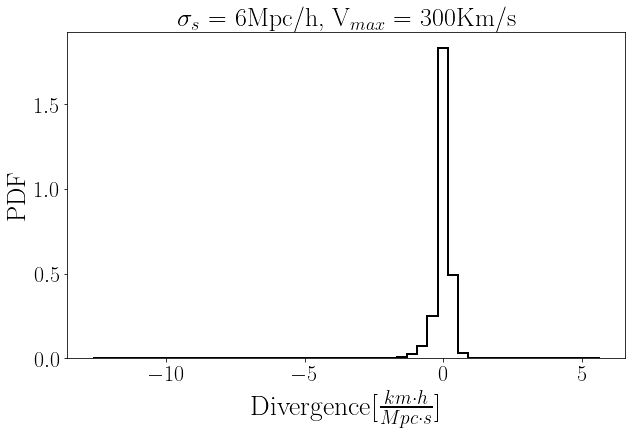

In [4]:
plt.figure(figsize = (10,6))
plt.rcParams.update({'font.size': 26})
plt.hist(divergencias[0].flatten(), bins = 50, density = True,edgecolor = 'black',histtype = 'step',lw = 2)
plt.title(r"$\R_s $ = 6Mpc/h, V$_{max}$ = 300Km/s", fontsize = 26)
plt.xlabel(r'Divergence[$\frac{km\cdot h}{Mpc\cdot s}]$', fontsize = 28)
plt.ylabel("PDF", fontsize = 26)
    

plt.savefig("grad_dist_sigma_6_vmax_300.png")

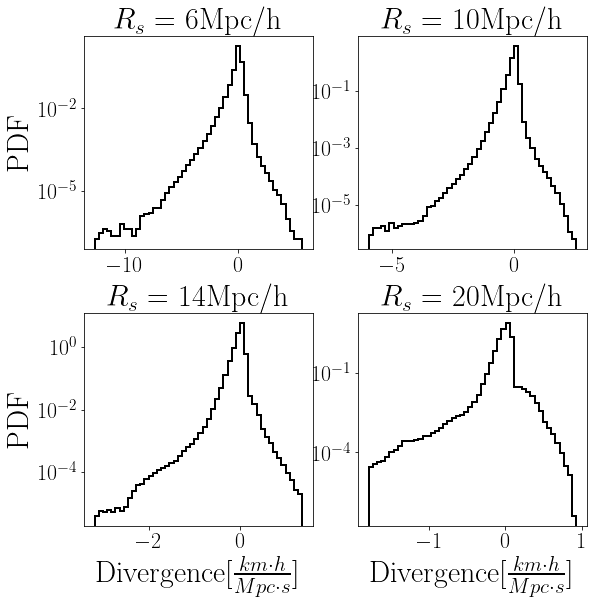

In [14]:
rangos = [None,None,None,None]
plt.figure(figsize = (9,9))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(divergencias[i].flatten(), bins = 50, density = True,edgecolor = 'black', range = rangos[i],histtype = 'step',lw = 2)
    plt.title(r"$R_s $ = {}Mpc/h".format(archivos[i]*2))
    if(i>=2):
        plt.xlabel(r'Divergence[$\frac{km\cdot h}{Mpc\cdot s}]$')
    if(i%2 == 0):
            plt.ylabel("PDF")
    plt.yscale('log')
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.savefig("planck_divergence_sigmas.pdf")

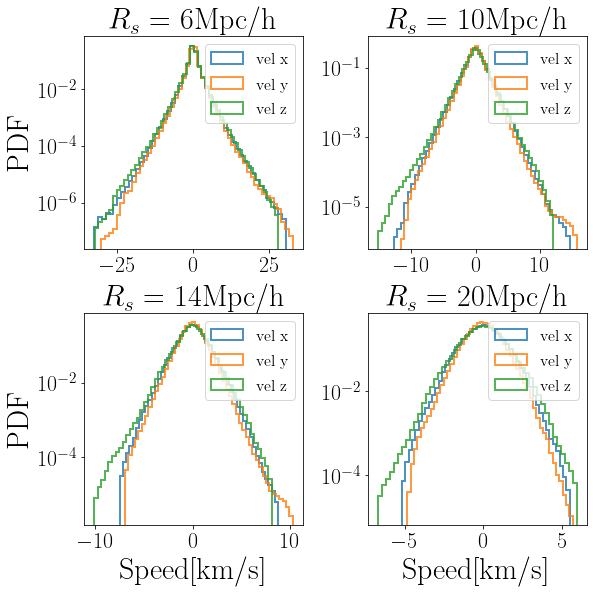

In [15]:
labels = ['vel x','vel y','vel z']
rangos = [None,None,None,None]
plt.figure(figsize = (9,9))
for i in range(4):
    vel_actual = []
    plt.subplot(2,2,i+1)
    for j in range(3):
        plt.hist(velocidades[i][j].flatten(), bins = 50,alpha = 0.8, density = True,histtype = 'step', lw = 2, label = labels[j])
    plt.title(r"$R_s $ = {}Mpc/h".format(archivos[i]*2))
    if(i>=2):
        plt.xlabel("Speed[km/s]")
    if(i%2 == 0):
        plt.ylabel("PDF")
    plt.legend(fontsize = 16)
    plt.yscale('log')

    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig("planck_velocity_sigmas.pdf")